<a href="https://colab.research.google.com/github/diofares/LLM-Estatistica-Atividade1/blob/main/LLM_Estatistica_Atividade1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Parte 1: Z-score and Binomial Distribution

##A - Busque um dataset e faça histogramas de duas features para cada classe no dataset, conforme procedimento mostrado em sala. Faça dois conjuntos de histogramas com tamanhos de bins diferentes. Discuta os histogramas do ponto de vista de classificação usando aprendizado de máquina e também discuta os tamanhos dos bins usados. Não esqueça do contexto sobre o dataset usado, com a explicação sobre ele, suas classes e features.

###O dataset usado é o Heart Disease Dataset. A ideia dele é prever se uma pessoa tem doença cardíaca (1) ou não tem (0) usando vários dados médicos. Para esta parte da análise, olhamos só para duas variáveis numéricas:

* oldpeak: Depressão do segmento ST induzida por exercício em relação ao repouso. É uma medida numérica contínua, onde o valor 0 é muito frequente (indica normalidade no ECG).

* thalach: Frequência cardíaca máxima alcançada (Maximum Heart Rate). É uma variável contínua que mede o pico de batimentos durante o teste de esforço.

###Feature "oldpeak":

* Sem Doença: os valores são mais variados. Apesar de muitos estarem no zero, existe uma “cauda” que vai até valores como 4, 5 ou 6.

* Com Doença: quase todos os valores ficam em 0 ou muito perto disso. Quase não aparecem registros acima de 2.

###Feature "thalach":

* Sem Doença: o pico do histograma fica em valores mais baixos, algo perto de 130–150 bpm.

* Com Doença: o pico é mais a direita, perto de 160–170 bpm, indicando frequências mais altas.

###O que isso significa para Machine Learning: oldpeak é uma feature muito forte para separar as classes: valores acima de 2 praticamente indicam “Sem Doença”, algo que uma Árvore de Decisão detectaria facilmente. Já o thalach apresenta médias diferentes entre as classes, o que ajuda modelos probabilísticos (como Regressão Logística ou Naive Bayes) a distinguir os grupos mesmo com alguma sobreposição.

Using Colab cache for faster access to the 'heart-disease-dataset' dataset.


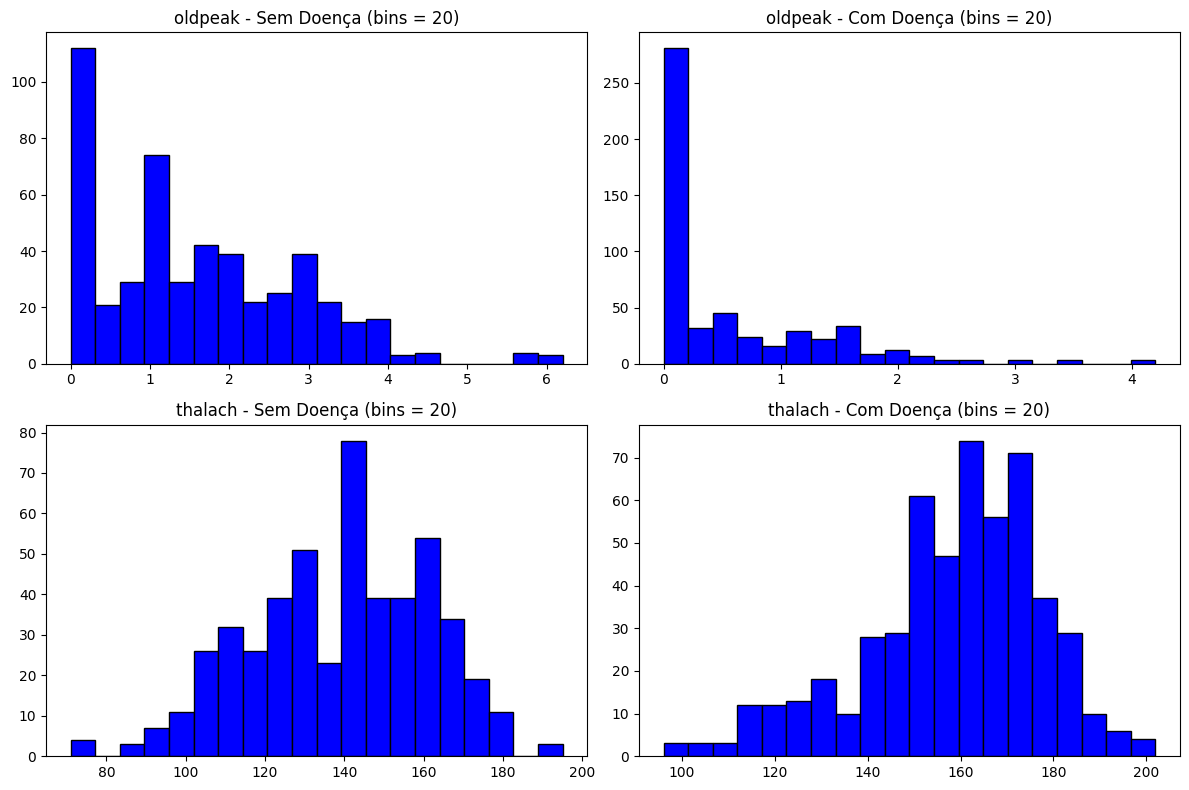

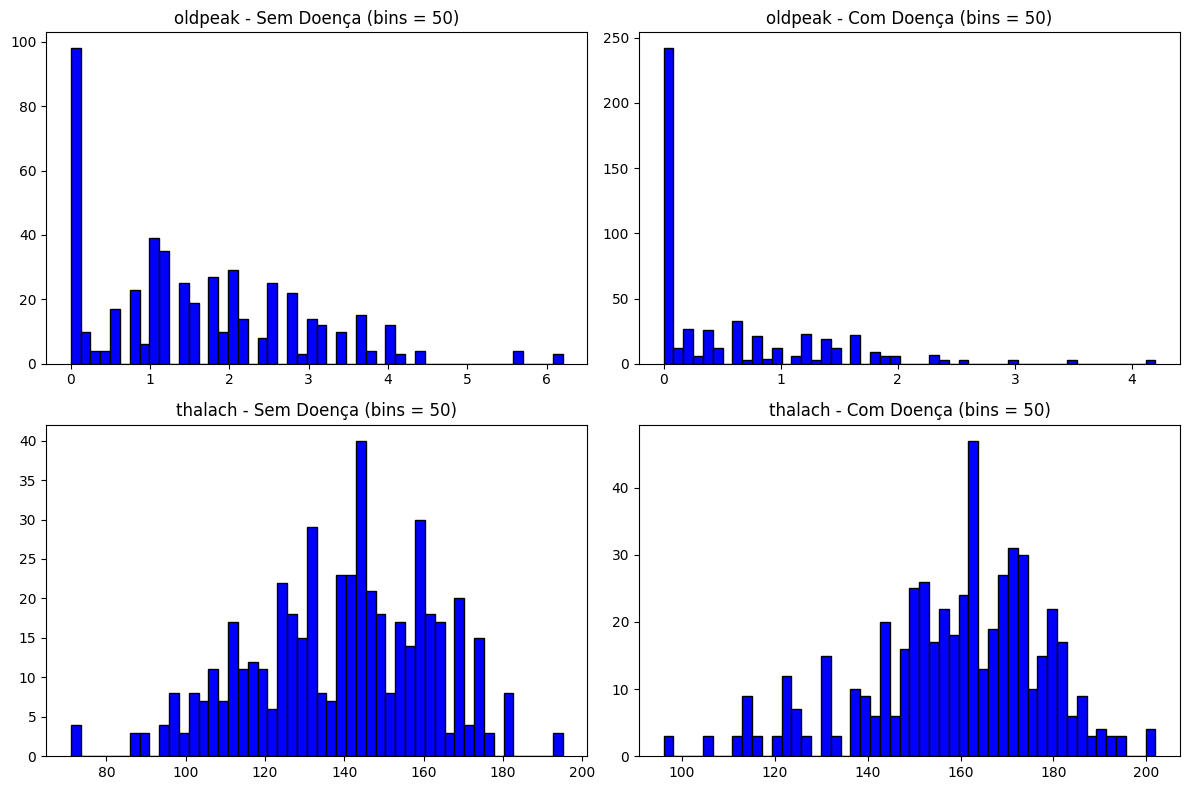

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import kagglehub

path = kagglehub.dataset_download("johnsmith88/heart-disease-dataset")
csv_path = path + "/heart.csv"
df_coracao = pd.read_csv(csv_path)

df_coracao["target"] = df_coracao["target"].map({0: "Sem Doença", 1: "Com Doença"})
features_analise = ["oldpeak", "thalach"]
grupos = ["Sem Doença", "Com Doença"]

def plotar_histogramas(df, grupos, features, num_bins):
  linhas = len(features)
  colunas = len(grupos)

  fig, matriz = plt.subplots(linhas, colunas, figsize=(12, 8))

  for i, feat in enumerate(features):
    for j, grupo in enumerate(grupos):
      subset = df[df["target"] == grupo][feat]
      matriz[i][j].hist(subset, bins=num_bins, color="blue", edgecolor="black")
      matriz[i][j].set_title(f"{feat} - {grupo} (bins = {num_bins})")

  plt.tight_layout()
  plt.show()

plotar_histogramas(df_coracao, grupos, features_analise, num_bins = 20)
plotar_histogramas(df_coracao, grupos, features_analise, num_bins = 50)

##B - Considerando o primeiro trabalho, defina um experimento em que dados são coletados de uma variável de interesse do seu trabalho. Produza dados artificiais, plote o histograma e a distribuição que aproxime os dados. Em seguida, defina estudos como o exemplo da pizza explicado em sala, sempre partido da versão não padronizada e depois os cálculos na versão padronizada.  Sempre considerando o contexto do seu primeiro trabalho. Use uma função de Python e uma tabela para obter os valores de probabilidade.


Using Colab cache for faster access to the 'heart-disease-dataset' dataset.


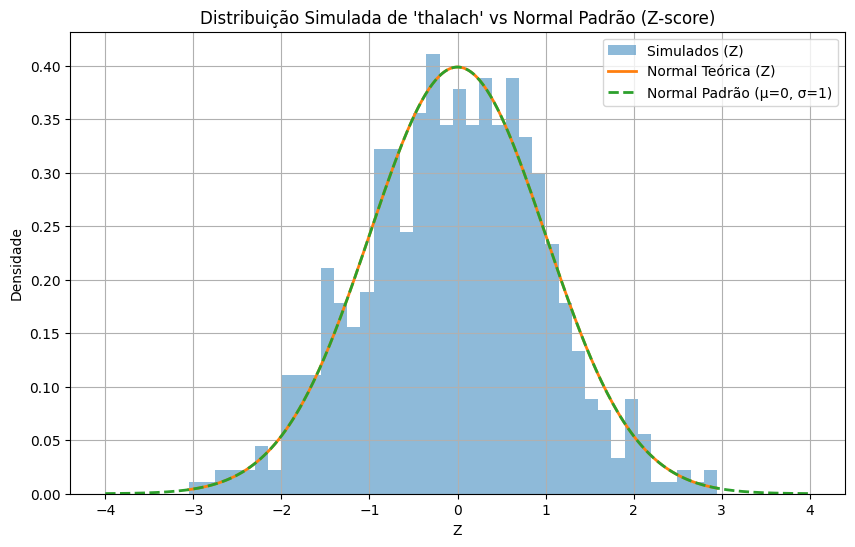

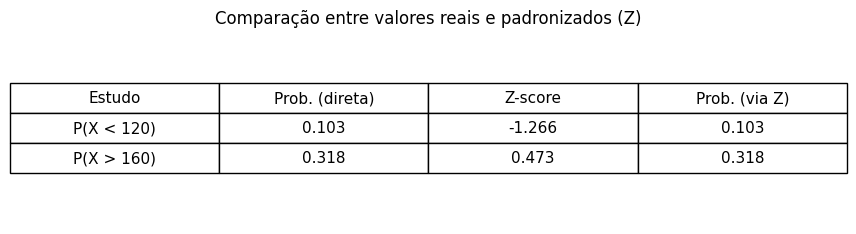

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import kagglehub

path = kagglehub.dataset_download("johnsmith88/heart-disease-dataset")
df_coracao = pd.read_csv(path + "/heart.csv")

variavel = df_coracao["thalach"].dropna()
mu = variavel.mean()
sd = variavel.std()
simulados = np.random.normal(mu, sd, 600)

simulados_z = (simulados - mu) / sd
x_axis_z = (np.linspace(simulados.min(), simulados.max(), 300) - mu) / sd
z_range = np.linspace(-4, 4, 400)
normal_padrao = norm.pdf(z_range)

plt.figure(figsize=(10,6))
plt.hist(simulados_z, bins=40, density=True, alpha=0.5, label="Simulados (Z)")
plt.plot(x_axis_z, norm.pdf(x_axis_z, 0, 1), linewidth=2, label="Normal Teórica (Z)")
plt.plot(z_range, normal_padrao, linewidth=2, linestyle="--", label="Normal Padrão (µ=0, σ=1)")
plt.title("Distribuição Simulada de 'thalach' vs Normal Padrão (Z-score)")
plt.xlabel("Z")
plt.ylabel("Densidade")
plt.legend()
plt.grid(True)
plt.show()

lim1 = 120
p1 = norm.cdf(lim1, mu, sd)
z1 = (lim1 - mu) / sd
p1_z = norm.cdf(z1)
lim2 = 160
p2 = 1 - norm.cdf(lim2, mu, sd)
z2 = (lim2 - mu) / sd
p2_z = 1 - norm.cdf(z2)

df_resumo = pd.DataFrame({"Estudo":[f"P(X < {lim1})",f"P(X > {lim2})"],"Prob. (direta)":[round(p1,3),round(p2,3)],"Z-score":[round(z1,3),round(z2,3)],"Prob. (via Z)":[round(p1_z,3),round(p2_z,3)]})

fig, ax = plt.subplots(figsize=(9,2.5))
ax.axis("off")
tabela = ax.table(cellText=df_resumo.values, colLabels=df_resumo.columns, cellLoc="center", loc="center")
tabela.scale(1.2,1.8)
tabela.set_fontsize(11)
plt.title("Comparação entre valores reais e padronizados (Z)")
plt.show()


###O objetivo foi analisar a frequência cardíaca máxima (thalach) de pacientes com suspeita de doença cardíaca e entender como esses valores se comportam estatisticamente.
###Foram usados dados reais de pacientes, mas para fins de estudo, foram gerados valores simulados que seguem a mesma média e desvio padrão dos dados reais.
###Os valores simulados foram transformados em Z-scores, ou seja, cada valor foi convertido para uma escala em que a média é 0 e o desvio padrão é 1.
###Foi criado um histograma para ver a distribuição dos valores simulados.Sobre o histograma, foram desenhadas curvas da distribuição normal teórica (baseada nos dados) e da normal padrão, mostrando se os dados seguem o comportamento esperado da normalidade.
###Foram escolhidos dois limites de frequência cardíaca: 120 e 160. Calculou-se a probabilidade de um paciente ter frequência menor que 120 e maior que 160, usando tanto os valores originais quanto os Z-scores. Isso mostra que os cálculos com dados padronizados produzem os mesmos resultados que os cálculos diretos.
###Foi criada uma tabela comparativa, mostrando probabilidades calculadas diretamente e via Z-score, além dos valores de Z correspondentes.
###Esse estudo ajuda a entender como a frequência cardíaca máxima se distribui, identificar limites de interesse clínico e visualizar o comportamento estatístico dos dados.

##C - Para s = 0.80, reproduza a mesma simulação do slide anterior. Faça o cálculo explicitamente, usando a equação. Compare os resultados. Mostre o histograma também para as 10 primeiras amostras, conforme exemplo dos próximos slides.

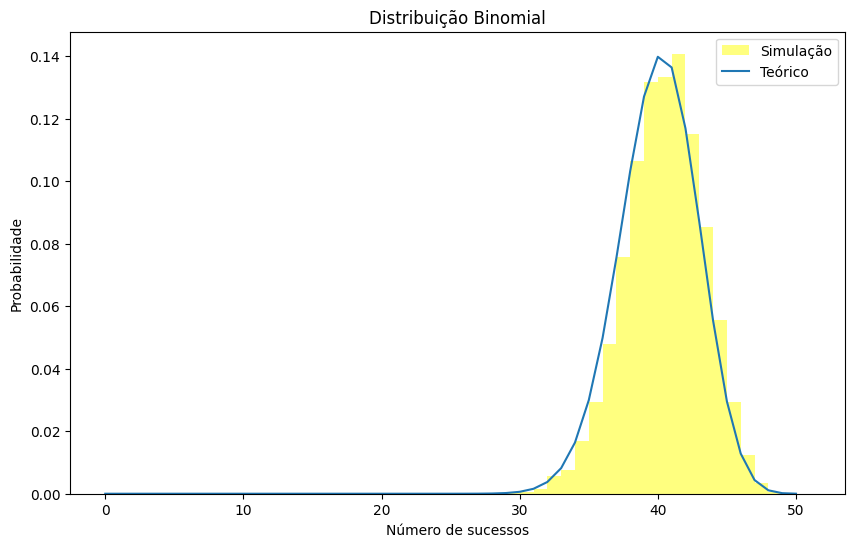

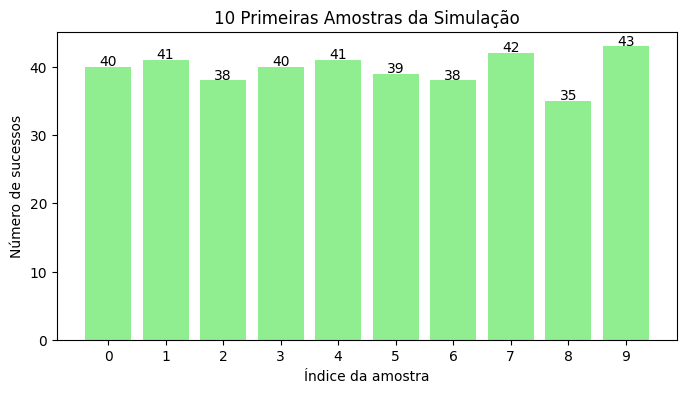

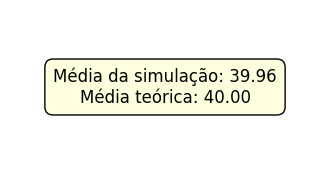

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from math import comb

n_tentativas = 50
p_sucesso = 0.8
q_fracasso = 1 - p_sucesso
n_amostras = 10000

x_valores = np.arange(n_tentativas + 1)
p_teorica = [comb(n_tentativas, k)*(p_sucesso**k)*(q_fracasso**(n_tentativas - k)) for k in x_valores]

simulacao_binomial = np.random.binomial(n=n_tentativas, p=p_sucesso, size=n_amostras)

plt.figure(figsize=(10,6))
plt.hist(simulacao_binomial,bins=range(n_tentativas+2),density=True,alpha=0.5,color='yellow',label='Simulação')
plt.plot(x_valores,p_teorica, label='Teórico')
plt.title(f'Distribuição Binomial')
plt.xlabel('Número de sucessos')
plt.ylabel('Probabilidade')
plt.legend()
plt.show()

primeiras_10 = simulacao_binomial[:10]
plt.figure(figsize=(8,4))
barras = plt.bar(range(10),primeiras_10,color='lightgreen')
plt.title('10 Primeiras Amostras da Simulação')
plt.xlabel('Índice da amostra')
plt.ylabel('Número de sucessos')

plt.xticks(range(10))

for b in barras:
  altura = b.get_height()
  plt.text(b.get_x()+b.get_width()/2,altura+0.2,str(int(altura)),ha='center')
plt.show()

media_simulacao = np.mean(simulacao_binomial)
media_teorica = n_tentativas*p_sucesso
plt.figure(figsize=(4,2))
plt.axis('off')
plt.text(0.5,0.5,f"Média da simulação: {media_simulacao:.2f}\nMédia teórica: {media_teorica:.2f}", ha='center', va='center', fontsize=12, bbox=dict(facecolor='lightyellow', edgecolor='black', boxstyle='round,pad=0.5'))
plt.show()

###No código, trabalha-se o com a Distribuição Binomial, que mostra a probabilidade de um certo número de sucessos em várias tentativas. Aqui a gente definiu:

* n_tentativas = 50: cada experimento tem 50 tentativas.

* p_sucesso = 0.8: a chance de sucesso em cada tentativa é 80%.

* n_amostras = 10000: vamos simular 10 mil experimentos para ver como a distribuição se comporta.

###Primeiro, eu calculei a probabilidade teórica de cada número de sucessos usando a fórmula da binomial. Depois, fiz uma simulação aleatória com np.random.binomial para gerar 10 mil resultados de experimentos.

###Então criei 2 gráficos:

* Histograma geral: compara a distribuição simulada (azul) com a teórica (linha vermelha). Isso mostra que a simulação bate bem com a teoria.
* Histograma das 10 primeiras amostras: mostra os resultados das primeiras 10 simulações, para ter uma ideia de como os números vão aparecendo na prática.

#Parte 2: Sample Distribution and Sampling Distribution, TLC and P-value

##A - Sample Distribution and Sampling Distribution
##A partir do que foi feito na Atividade 2 “Considerando o primeiro trabalho, defina um experimento em que dados são coletados de uma variável de interesse do seu trabalho”, crie  uma população artificial dessa variável com uma distribuição Gaussiana e demonstre sample distribution and sampling distribution. Faça avaliações de probabilidade de possíveis eventos.

Using Colab cache for faster access to the 'heart-disease-dataset' dataset.


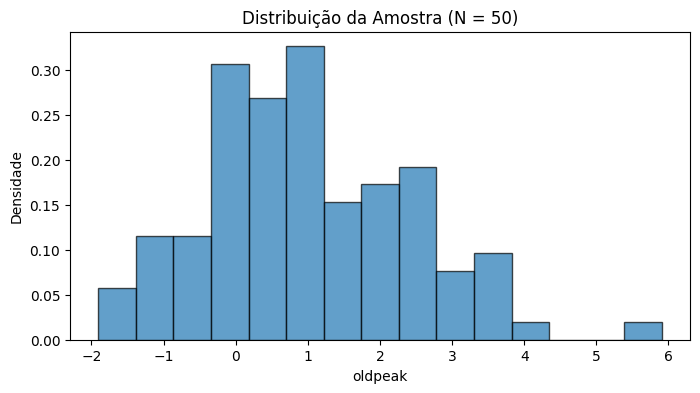

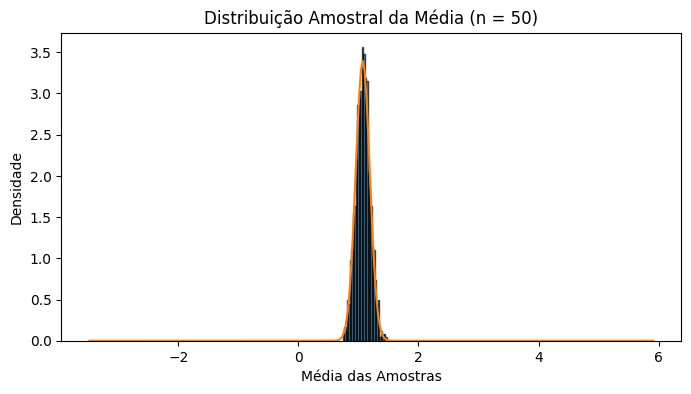

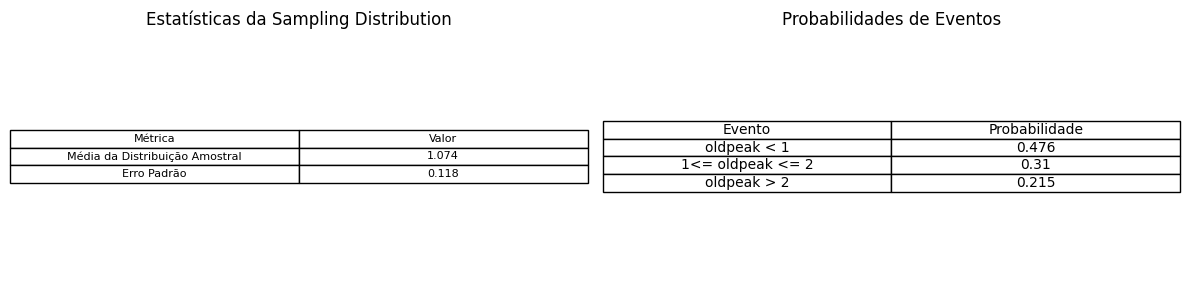

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import kagglehub

path = kagglehub.dataset_download("johnsmith88/heart-disease-dataset")
df = pd.read_csv(path + "/heart.csv")

dados = df["oldpeak"].dropna()

media = dados.mean()
sigma = dados.std()

N = 10000
populacao = np.random.normal(media, sigma, N)
x = np.linspace(populacao.min(), populacao.max(), 300)

n = 100
amostra = np.random.choice(populacao, size=n, replace=False)

plt.figure(figsize=(8,4))
plt.hist(amostra, bins=15, density=True, alpha=0.7, edgecolor="black")
plt.title("Distribuição da Amostra (N = 50)")
plt.xlabel("oldpeak")
plt.ylabel("Densidade")
plt.show()

num_amostras = 1000
medias_amostrais = [np.mean(np.random.choice(populacao, size=n, replace=False)) for a in range(num_amostras)]
plt.figure(figsize=(8,4))
plt.hist(medias_amostrais, bins=30, density=True, alpha=0.7, edgecolor="black")
plt.plot(x, norm.pdf(x, media, sigma / np.sqrt(n)))
plt.title("Distribuição Amostral da Média (n = 50)")
plt.xlabel("Média das Amostras")
plt.ylabel("Densidade")
plt.show()

media_sampling = np.mean(medias_amostrais)
erro_padrao = sigma / np.sqrt(n)

eventos = {"oldpeak < 1" : (None, 1), "1<= oldpeak <= 2" : (1,2), "oldpeak > 2" : (2, None)}

resultados = []
for evento, (a, b) in eventos.items():
    if a is None:
        p = norm.cdf(b, media, sigma)
    elif b is None:
        p = 1 - norm.cdf(a, media, sigma)
    else:
        p = norm.cdf(b, media, sigma) - norm.cdf(a, media, sigma)
    resultados.append([evento, round(p, 3)])

df_est = pd.DataFrame({"Métrica":["Média da Distribuição Amostral", "Erro Padrão"], "Valor" : [round(media_sampling, 3), round(erro_padrao, 3)]})

df_prob = pd.DataFrame(resultados, columns=["Evento", "Probabilidade"])

fig, ax = plt.subplots(1, 2, figsize=(12,3))
ax[0].axis("off")
ax[0].table(cellText=df_est.values, colLabels=df_est.columns, cellLoc="center", loc="center")
ax[0].set_title("Estatísticas da Sampling Distribution")

ax[1].axis("off")
ax[1].table(cellText=df_prob.values, colLabels=df_prob.columns, cellLoc="center", loc="center")
ax[1].set_title("Probabilidades de Eventos")

plt.tight_layout()
plt.show()

###Nesse estudo, foi utilizada a variável oldpeak do conjunto de dados de doenças cardíacas para simular um experimento estatístico. Primeiro, foram calculados a média e o desvio padrão dessa variável a partir dos dados reais. Com esses valores, foi criada uma população artificial com 10.000 elementos seguindo uma distribuição normal (Gaussiana). Essa população representa um cenário ideal, onde se conhece completamente o comportamento da variável analisada.

###Em seguida, foi retirada uma amostra aleatória de 100 valores dessa população artificial. Essa etapa representa uma situação comum na prática, em que não é possível observar toda a população, mas apenas uma parte dela. O gráfico da amostra mostra que os dados não seguem perfeitamente a curva normal, apresentando variações e irregularidades naturais de uma coleta limitada.

###Depois disso, foi construída a distribuição amostral da média. Para isso, o processo de amostragem foi repetido 1.000 vezes, sempre calculando a média de cada amostra. O conjunto dessas médias forma uma nova distribuição, que é mais concentrada e organizada do que a distribuição da amostra individual. Isso mostra que, mesmo com amostras pequenas, as médias tendem a se aproximar do valor real da população quando o processo é repetido várias vezes.

###A média da distribuição amostral ficou muito próxima da média da população artificial, o que indica que a média das amostras é uma boa representação do valor real da variável oldpeak. Isso reforça a ideia de que, mesmo sem acesso a todos os dados, é possível obter boas estimativas usando amostragem.

###O erro padrão encontrado foi relativamente baixo, mostrando que as médias das amostras não variam muito entre si. Na prática, isso significa que a estimativa da média é confiável quando se utiliza um tamanho de amostra adequado.
###Além disso, as probabilidades calculadas para diferentes faixas de valores de oldpeak ajudam a entender como esses valores se distribuem na população. Observa-se que a maior parte dos indivíduos apresenta valores mais baixos, enquanto uma parcela menor possui valores mais altos, que costumam estar associados a maior risco cardíaco no contexto do conjunto de dados.

##B - TLC
##Aplique o TLC a função de distribuição gama e avalie quatro diferentes tamanhos de amostra, começando em 10.

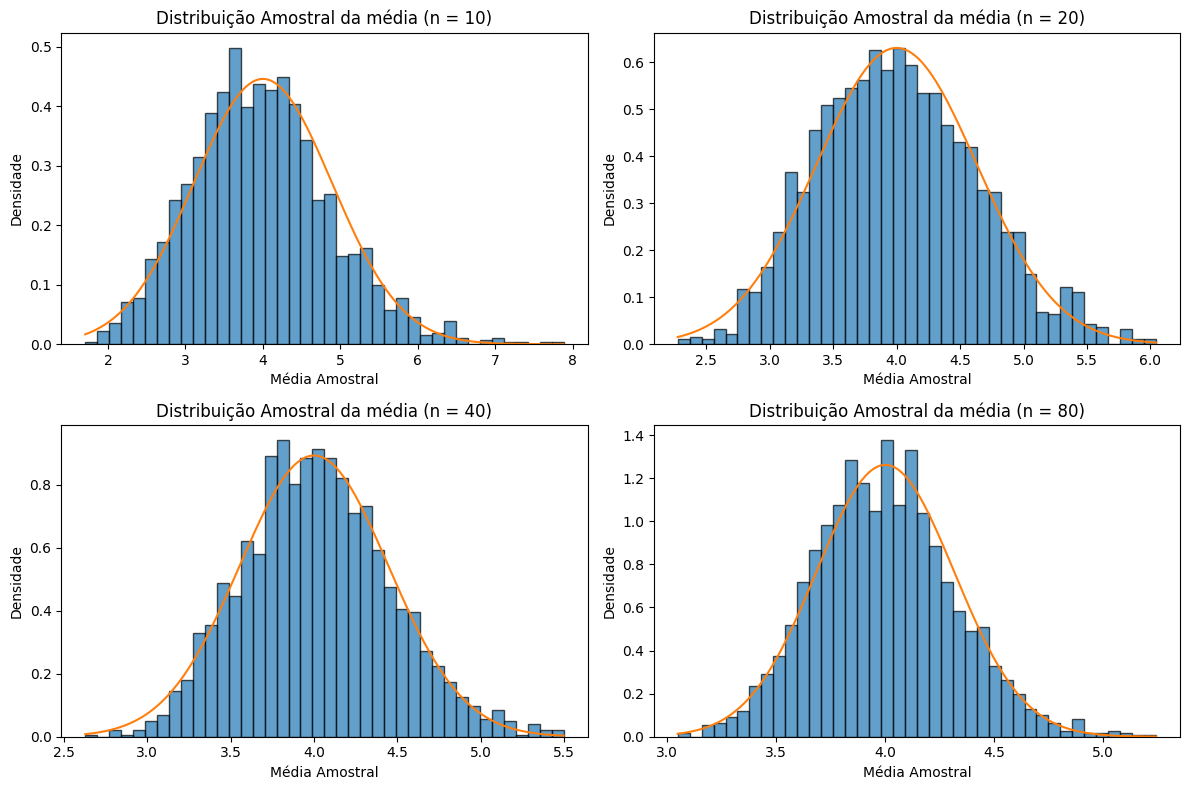

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, norm

shape=2
scale=2
media=shape*scale
variancia=shape*scale**2

tamanhos= [10,20, 40,80]
n_amostras = 2000

plt.figure(figsize=(12,8))

for i,n in enumerate(tamanhos, 1):
  medias_amostrais=[np.mean(np.random.gamma(shape,scale,n)) for x in range(n_amostras)]
  plt.subplot(2,2,i)
  plt.hist(medias_amostrais, bins=40, density=True, alpha=0.7, edgecolor="black")
  x=np.linspace(min(medias_amostrais),max(medias_amostrais),300)
  plt.plot(x,norm.pdf(x,media,np.sqrt(variancia/n)))
  plt.title(f"Distribuição Amostral da média (n = {n})")
  plt.xlabel("Média Amostral")
  plt.ylabel("Densidade")

plt.tight_layout()
plt.show()

###O código apresentado tem como objetivo demonstrar visualmente o Teorema do Limite Central (TLC). Para isso, é utilizada uma distribuição Gama, que é naturalmente assimétrica, mostrando que mesmo quando os dados não seguem uma distribuição normal, a distribuição das médias amostrais tende a se aproximar de uma curva normal conforme o tamanho da amostra aumenta.
###Inicialmente, o código define uma população teórica que segue a distribuição Gama, utilizando os parâmetros shape = 2 e scale = 2. A partir desses parâmetros, são calculadas a média e a variância teóricas da população. Esses valores representam o comportamento real da distribuição e servem como referência para comparação com os resultados obtidos por meio da simulação.
###Em seguida, são definidos quatro tamanhos diferentes de amostra: 10, 20, 40 e 80. Para cada um desses tamanhos, o experimento é repetido 2000 vezes. Em cada repetição, são gerados valores aleatórios da distribuição Gama e calculada a média do conjunto. O conjunto dessas médias forma a chamada distribuição amostral da média, que é então representada por meio de histogramas.
###Sobre cada histograma, é desenhada uma curva normal teórica. Essa curva utiliza como desvio padrão o erro padrão da média, que depende do tamanho da amostra. Conforme o valor de n aumenta, o erro padrão diminui, tornando a curva cada vez mais estreita e concentrada em torno da média da população.
###Para o tamanho de amostra n = 10, a distribuição das médias ainda apresenta uma leve assimetria, refletindo a influência da forma original da distribuição Gama. Mesmo assim, já é possível observar uma tendência de aproximação com a curva normal. A medida que o tamanho da amostra aumenta para n = 20 e n = 40, a distribuição das médias torna-se progressivamente mais simétrica e concentrada, indicando maior estabilidade das médias amostrais. Quando n = 80, o histograma praticamente se sobrepõe à curva normal teórica, evidenciando que a distribuição das médias pode ser bem aproximada por uma normal. Esses resultados confirmam que, independentemente da distribuição original dos dados, a média amostral tende a seguir uma distribuição normal quando o tamanho da amostra é suficientemente grande, validando na prática o Teorema do Limite Central.

##C - p-value
##Faça um programa que mostra o passo a passo para calcular o p-value do evento abaixo. Coloque figuras para cada passo.

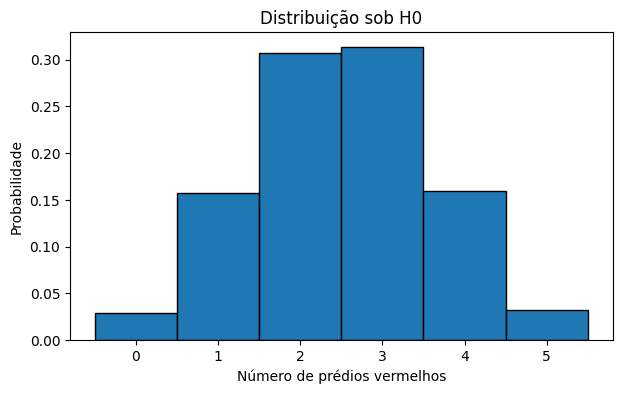

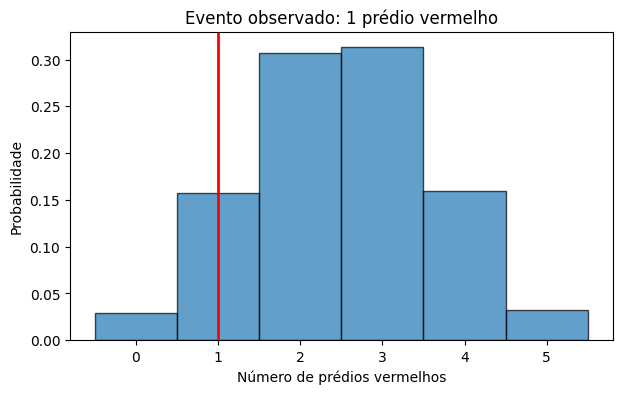

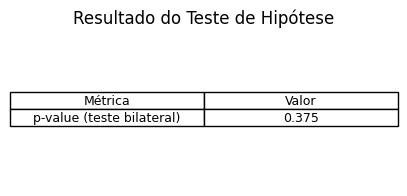

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import binom

n=5
p0=0.5
observado=1
num_simulacoes=10000

resultados = np.random.binomial(n, p0, num_simulacoes)
plt.figure(figsize=(7,4))
plt.hist(resultados,bins=np.arange(-0.5,n+1.5,1),density=True,edgecolor="black")
plt.xticks(range(n+1))
plt.xlabel("Número de prédios vermelhos")
plt.ylabel("Probabilidade")
plt.title("Distribuição sob H0")
plt.show()

plt.figure(figsize=(7,4))
plt.hist(resultados,bins=np.arange(-0.5,n+1.5,1),density=True,edgecolor="black",alpha=0.7)
plt.axvline(observado,color="red",linewidth=2)
plt.xticks(range(n+1))
plt.xlabel("Número de prédios vermelhos")
plt.ylabel("Probabilidade")
plt.title("Evento observado: 1 prédio vermelho")
plt.show()

p_value = min(1,2*binom.cdf(observado,n,p0))
df_resultado = pd.DataFrame([["p-value (teste bilateral)", round(p_value,4)]], columns=["Métrica","Valor"])
fig,ax=plt.subplots(figsize=(5,2))
ax.axis("off")
ax.table(cellText=df_resultado.values,colLabels=df_resultado.columns,cellLoc="center",loc="center")
ax.set_title("Resultado do Teste de Hipótese")
plt.show()


##D - p-value
##Crie duas Gaussianas como mostrado abaixo (é só variar a média). Sortei 100 sequências de três valores na azul e para cada sequência calcule o p-value a partir da vermelha. Veja a seta vermelha que indica a partir de qual amostra é calculado p-value. Calcule a taxa de falso negativos (p-value acima de 5%).